![title](img/heartbeat.png)

# First Notebook

## Learning how things work

For titles #, ##, ...

Create above: a

Create below: b

Undo: z

Execute stay in cell: ctrl + return

Execute to next cell: shift + return

Switch mode: return - esc

Switch language: m - y

In [13]:
2 + 3

5

Code block: ```
```
x = 5 * 5
x += 2
```

Line: ---

---

To autocomplete code: tab

## Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

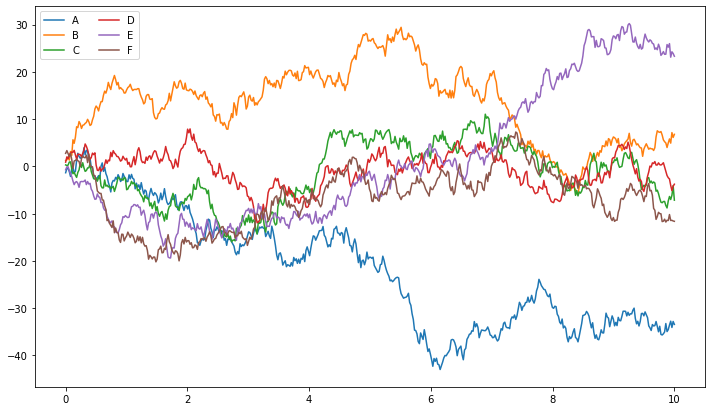

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend("ABCDEF", ncol=2, loc="upper left")

## Fetching data

In [4]:
import pandas as pd
import requests

In [5]:
def get_historic_price(symbol, exchange="bitfinex", after="2018-09-01"):
    url = "https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc".format(
        symbol=symbol, exchange=exchange
    )
    resp = requests.get(
        url,
        params={"periods": "3600", "after": str(int(pd.Timestamp(after).timestamp()))},
    )
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(
        data["result"]["3600"],
        columns=[
            "CloseTime",
            "OpenPrice",
            "HighPrice",
            "LowPrice",
            "ClosePrice",
            "Volume",
            "NA",
        ],
    )
    df["CloseTime"] = pd.to_datetime(df["CloseTime"], unit="s")
    df.set_index("CloseTime", inplace=True)
    return df

In [6]:
last_week = pd.Timestamp.now() - pd.offsets.Day(7)
last_week

Timestamp('2020-10-07 04:58:12.389168')

In [7]:
btc = get_historic_price("btc", "bitstamp", after=last_week)

In [8]:
eth = get_historic_price("eth", "bitstamp", after=last_week)

## Visualizing data

In [9]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02
mean,11149.210120,11179.294371,11121.394551,11154.074491,211.410674,2.350140e+06
std,329.894593,333.247371,322.783082,327.528226,206.670432,2.292583e+06
min,10555.540000,10579.390000,10535.060000,10560.220000,11.879251,1.345721e+05
25%,10884.060000,10907.320000,10864.085000,10886.905000,68.427383,7.798980e+05
50%,11335.170000,11362.140000,11303.220000,11339.370000,134.145815,1.525005e+06
75%,11390.075000,11420.875000,11367.730000,11391.030000,287.242357,3.192207e+06
max,11692.820000,11731.700000,11640.100000,11692.870000,1238.442537,1.343307e+07


In [10]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-10-07 05:00:00,10575.41,10601.14,10572.73,10595.78,115.387983,1.222000e+06
2020-10-07 06:00:00,10596.22,10622.10,10582.39,10614.61,143.756875,1.525005e+06
2020-10-07 07:00:00,10611.23,10633.79,10606.24,10624.83,103.898808,1.103352e+06
2020-10-07 08:00:00,10628.56,10634.00,10600.00,10617.83,207.184366,2.199195e+06
2020-10-07 09:00:00,10616.48,10627.42,10598.45,10618.41,220.994396,2.345210e+06


<AxesSubplot:xlabel='CloseTime'>

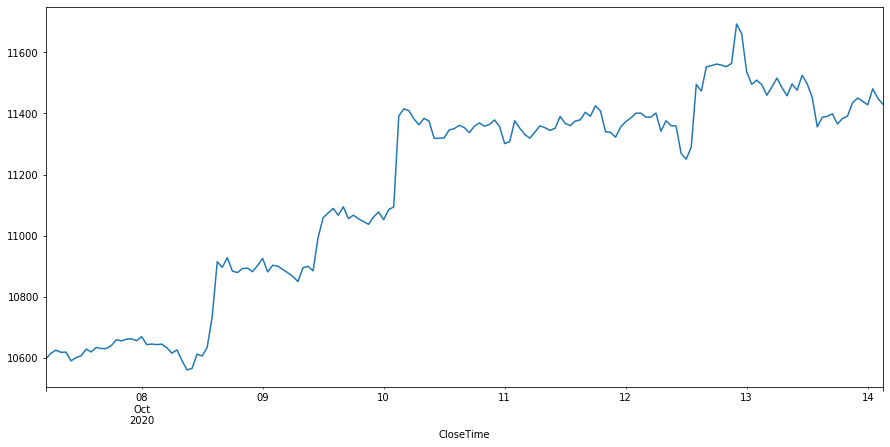

In [11]:
btc["ClosePrice"].plot(figsize=(15, 7))

In [12]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-10-07 05:00:00,336.83,338.70,336.34,338.33,867.877839,292927.540854
2020-10-07 06:00:00,338.39,340.24,337.19,339.62,1116.867317,378300.211872
2020-10-07 07:00:00,339.63,341.51,339.08,341.24,426.882011,145361.056946
2020-10-07 08:00:00,341.28,342.48,340.00,341.30,1383.461685,471634.170415
2020-10-07 09:00:00,341.67,342.18,339.75,340.25,766.226230,260882.400295


<AxesSubplot:xlabel='CloseTime'>

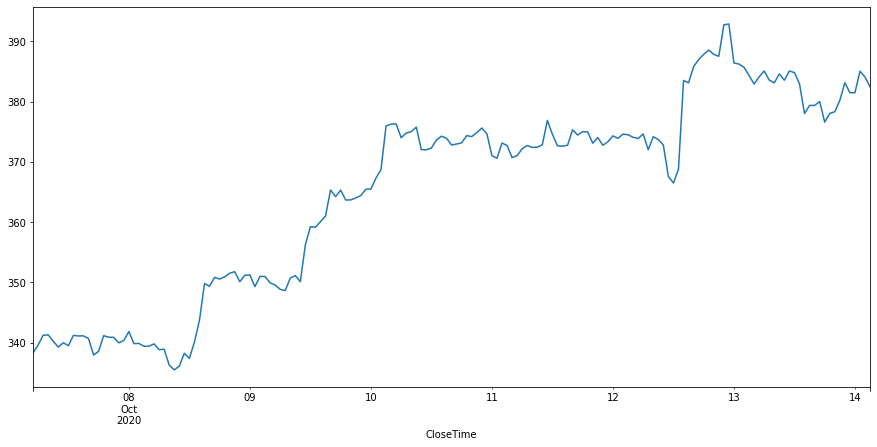

In [13]:
eth["ClosePrice"].plot(figsize=(15, 7))

In [14]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show

In [15]:
output_notebook()

Loading BokehJS ...

In [16]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha = 0.3
p1.xaxis.axis_label = "Date"
p1.yaxis.axis_label = "Price"

p1.line(btc.index, btc["ClosePrice"], color="#f2a900", legend="Bitcoin")
# p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

## Exporting data

In [17]:
writer = pd.ExcelWriter("data/cryptos.xlsx")

In [18]:
btc.to_excel(writer, sheet_name="Bitcoin")

In [19]:
eth.to_excel(writer, sheet_name="Ether")

In [20]:
writer.save()